In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [ ]:
df.shape

(119390, 32)

In [ ]:
def data_clean(df):
  df.fillna(0,inplace=True)
print(df.isnull().sum())
data_clean(df)

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
list=['adults','children','babies']
for i in list:
  print('{} has unique value as {}'.format(i,df[i].unique()))

adults has unique value as [ 2  1  3  4 40 26 50 27 55  0 20  6  5 10]
children has unique value as [ 0.  1.  2. 10.  3.]
babies has unique value as [ 0  1  2 10  9]


In [ ]:
filter = (df.children ==0) & (df.adults ==0) & (df.babies ==0)
df[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,No Deposit,0.0,174.0,0,Transient-Party,0.00,0,0,Check-Out,10/6/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,No Deposit,0.0,174.0,0,Transient,0.00,0,0,Check-Out,10/12/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,No Deposit,38.0,0.0,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,1/4/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,1/5/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,No Deposit,7.0,0.0,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,No Deposit,0.0,0.0,0,Transient,0.00,1,1,Check-Out,7/1/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,No Deposit,425.0,0.0,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,No Deposit,9.0,0.0,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


In [ ]:
pd.set_option('display.max_columns',32)
filter=(df.children ==0) & (df.adults ==0) & (df.babies ==0)
df[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,1,No Deposit,0.0,174.0,0,Transient-Party,0.00,0,0,Check-Out,10/6/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,0,No Deposit,0.0,174.0,0,Transient,0.00,0,0,Check-Out,10/12/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,0.0,0,SC,ESP,Groups,TA/TO,0,0,0,A,C,0,No Deposit,38.0,0.0,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,1/4/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,C,1,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,1/5/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,0.0,0,BB,CHE,Online TA,TA/TO,0,0,0,A,A,1,No Deposit,7.0,0.0,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,0.0,0,SC,PRT,Complementary,Direct,0,0,0,E,K,0,No Deposit,0.0,0.0,0,Transient,0.00,1,1,Check-Out,7/1/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,0.0,0,SC,SWE,Online TA,TA/TO,0,0,0,A,K,2,No Deposit,425.0,0.0,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,0.0,0,SC,RUS,Online TA,TA/TO,0,0,0,A,K,1,No Deposit,9.0,0.0,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


In [ ]:
df[~filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,9/7/2017


In [ ]:
data=df[~filter]
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [ ]:
country_wise_data=data[data['is_canceled']==0]['country'].value_counts().reset_index()
country_wise_data.columns=['country','No of guests']
country_wise_data

,country,No of guests
0,PRT,20977
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
161,BHR,1
162,DJI,1
163,MLI,1
164,NPL,1


In [ ]:
!pip install folium

In [ ]:
import folium
from folium.plugins import HeatMap
basemap = folium.Map()
!pip install plotly
import plotly.express as px

basemap = folium.Map()
guests_map = px.choropleth(country_wise_data, locations =country_wise_data['country'],
                         color = country_wise_data['No of guests'], hover_name = country_wise_data['country'])
guests_map.show()

In [ ]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [ ]:
data2=data[data['is_canceled']==0]
data2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

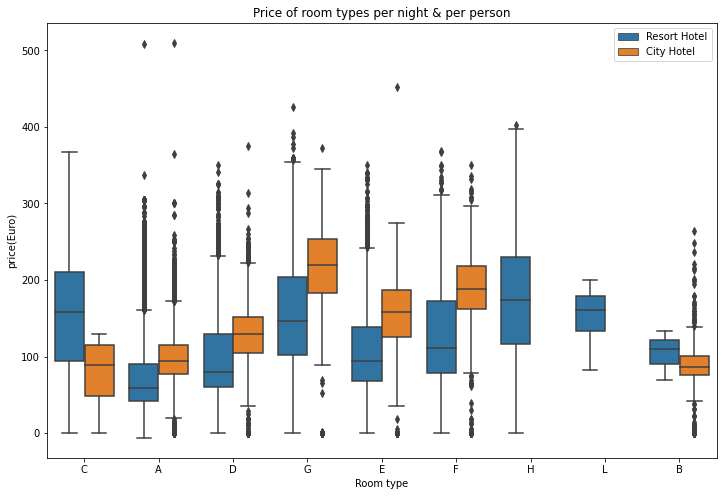

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x='reserved_room_type',
y='adr', hue='hotel',
data=data2) 
plt.title('Price of room types per night & per person')
plt.xlabel('Room type')
plt.ylabel('price(Euro)')
plt.legend()
plt.show()

In [ ]:
data_resort=df[(df['hotel'] == 'Resort Hotel') & (df['is_canceled']==0)]
data_city = df[(df['hotel'] == 'City Hotel') & (df['is_canceled']==0)]

In [ ]:
resort_hotel=data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_hotel

,arrival_date_month,adr
0,April,75.867816
1,August,181.205892
2,December,68.322236
3,February,54.147478
4,January,48.708919
5,July,150.122528
6,June,107.921869
7,March,57.012487
8,May,76.657558
9,November,48.681640


In [ ]:
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel

,arrival_date_month,adr
0,April,111.856824
1,August,118.412083
2,December,87.856764
3,February,86.183025
4,January,82.160634
5,July,115.563810
6,June,117.702075
7,March,90.170722
8,May,120.445842
9,November,86.500456


In [ ]:
final=resort_hotel.merge(city_hotel,on='arrival_date_month')
final.columns=['month','price_for_resort','price_for_cityhotel']
final

,month,price_for_resort,price_for_cityhotel
0,April,75.867816,111.856824
1,August,181.205892,118.412083
2,December,68.322236,87.856764
3,February,54.147478,86.183025
4,January,48.708919,82.160634
5,July,150.122528,115.563810
6,June,107.921869,117.702075
7,March,57.012487,90.170722
8,May,76.657558,120.445842
9,November,48.681640,86.500456


In [ ]:
!pip install sort-dataframeby-monthorweek
!pip install sorted-months-weekdays

  Created wheel for sort-dataframeby-monthorweek: filename=sort_dataframeby_monthorweek-0.4-py3-none-any.whl size=3442 sha256=d3049b33b617cfff2f272b7b59d4511e0ed9f2f26317ac93235a696e3a51c2ca
  Stored in directory: /root/.cache/pip/wheels/de/e1/ad/5fe265a9780676079c4b8caaaffaa8d5c4ab2f37cf823e8aa8
Successfully built sort-dataframeby-monthorweek
  Created wheel for sorted-months-weekdays: filename=sorted_months_weekdays-0.2-py3-none-any.whl size=3247 sha256=5fff4006b34c7c3c7692311acc36d33b27969330da6e9b75a0b895ef6bc6d0b2
  Stored in directory: /root/.cache/pip/wheels/4f/4f/78/3f1b8fc72651f7c766a6f73d667fccb12a8aabe240b38df7a4
Successfully built sorted-months-weekdays


In [ ]:
import sort_dataframeby_monthorweek as sd

In [ ]:
def sort_data(df,colname):
  return sd.Sort_Dataframeby_Month(df,colname)

In [ ]:
final = sort_data(final,'month')
final

,month,price_for_resort,price_for_cityhotel
0,January,48.708919,82.160634
1,February,54.147478,86.183025
2,March,57.012487,90.170722
3,April,75.867816,111.856824
4,May,76.657558,120.445842
5,June,107.921869,117.702075
6,July,150.122528,115.563810
7,August,181.205892,118.412083
8,September,96.416860,112.598452
9,October,61.727505,101.745956


In [ ]:
final.columns

Index(['month', 'price_for_resort', 'price_for_cityhotel'], dtype='object')

In [ ]:
px.line(final, x='month', y= ['month', 'price_for_resort', 'price_for_cityhotel'],title='Room price  per night over months')

In [ ]:
data_resort.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [ ]:
rush_resort=data_resort['arrival_date_month'].value_counts().reset_index()
rush_resort.columns=['month','no of guests']
rush_resort

,month,no of guests
0,August,3257
1,July,3137
2,October,2577
3,March,2573
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2038
9,December,2017


In [ ]:

rush_city=data_city['arrival_date_month'].value_counts().reset_index()
rush_city.columns=['month','no of guests']
rush_city

,month,no of guests
0,August,5381
1,July,4782
2,May,4579
3,June,4366
4,October,4337
5,September,4290
6,March,4072
7,April,4015
8,February,3064
9,November,2696


In [ ]:
final_rush=rush_resort.merge(rush_city,on='month')
final_rush
final_rush.columns=['month','no of guests on resort','no of guests in city hotel']

In [ ]:
final_rush=sort_data(final_rush,'month')
final_rush

,month,no of guests on resort,no of guests in city hotel
0,January,1868,2254
1,February,2308,3064
2,March,2573,4072
3,April,2550,4015
4,May,2535,4579
5,June,2038,4366
6,July,3137,4782
7,August,3257,5381
8,September,2102,4290
9,October,2577,4337


In [ ]:
final_rush.columns

Index(['month', 'no of guests on resort', 'no of guests in city hotel'], dtype='object')

In [ ]:
px.line(final_rush,x='month',y=['month', 'no of guests on resort', 'no of guests in city hotel'],title='Total no of gustes per month')

In [ ]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [ ]:
data.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.292876,0.016622,0.008315,-0.005948,-0.001323,0.025542,0.058182,0.004851,-0.032569,-0.083745,0.110139,-0.057365,-0.144832,-0.046770,-0.083594,0.054301,0.046492,-0.195701,-0.234877
lead_time,0.292876,1.000000,0.040334,0.127046,0.002306,0.085985,0.166892,0.117575,-0.037878,-0.021003,-0.123209,0.086025,-0.073599,0.002230,-0.013114,-0.085854,0.170008,-0.065018,-0.116624,-0.095949
arrival_date_year,0.016622,0.040334,1.000000,-0.540373,-0.000121,0.021694,0.031203,0.030266,0.054710,-0.013192,0.010281,-0.119905,0.029234,0.031416,0.056438,0.033682,-0.056348,0.198429,-0.013812,0.108610
arrival_date_week_number,0.008315,0.127046,-0.540373,1.000000,0.066572,0.018629,0.016047,0.026567,0.005556,0.010417,-0.031125,0.035493,-0.021009,0.006311,-0.018225,-0.032912,0.022677,0.076281,0.001980,0.026202
arrival_date_day_of_month,-0.005948,0.002306,-0.000121,0.066572,1.000000,-0.016225,-0.028362,-0.001754,0.014550,-0.000235,-0.006471,-0.027027,-0.000306,0.011266,0.000159,0.003667,0.022532,0.030291,0.008569,0.003026
stays_in_weekend_nights,-0.001323,0.085985,0.021694,0.018629,-0.016225,1.000000,0.494175,0.094759,0.046135,0.018607,-0.086009,-0.012769,-0.042859,0.050191,0.162411,-0.080783,-0.054399,0.050670,-0.018520,0.073124
stays_in_week_nights,0.025542,0.166892,0.031203,0.016047,-0.028362,0.494175,1.000000,0.096214,0.044652,0.020373,-0.095302,-0.013976,-0.048873,0.080018,0.196777,-0.044437,-0.002026,0.066847,-0.024933,0.068738
adults,0.058182,0.117575,0.030266,0.026567,-0.001754,0.094759,0.096214,1.000000,0.029409,0.017890,-0.140973,-0.007070,-0.108856,-0.041472,0.023370,-0.166182,-0.008365,0.224253,0.014438,0.123353
children,0.004851,-0.037878,0.054710,0.005556,0.014550,0.046135,0.044652,0.029409,1.000000,0.023999,-0.032475,-0.024755,-0.021078,0.051000,0.050461,-0.042554,-0.033293,0.325057,0.056247,0.081747
babies,-0.032569,-0.021003,-0.013192,0.010417,-0.000235,0.018607,0.020373,0.017890,0.023999,1.000000,-0.008813,-0.007509,-0.006552,0.085605,0.030235,-0.009426,-0.010627,0.029043,0.037389,0.097939


In [ ]:
data.corr()['is_canceled']


is_canceled                       1.000000
lead_time                         0.292876
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
arrival_date_day_of_month        -0.005948
stays_in_weekend_nights          -0.001323
stays_in_week_nights              0.025542
adults                            0.058182
children                          0.004851
babies                           -0.032569
is_repeated_guest                -0.083745
previous_cancellations            0.110139
previous_bookings_not_canceled   -0.057365
booking_changes                  -0.144832
agent                            -0.046770
company                          -0.083594
days_in_waiting_list              0.054301
adr                               0.046492
required_car_parking_spaces      -0.195701
total_of_special_requests        -0.234877
Name: is_canceled, dtype: float64

In [ ]:
data.corr().sort_values('is_canceled',ascending=False)

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.292876,0.016622,0.008315,-0.005948,-0.001323,0.025542,0.058182,0.004851,-0.032569,-0.083745,0.110139,-0.057365,-0.144832,-0.046770,-0.083594,0.054301,0.046492,-0.195701,-0.234877
lead_time,0.292876,1.000000,0.040334,0.127046,0.002306,0.085985,0.166892,0.117575,-0.037878,-0.021003,-0.123209,0.086025,-0.073599,0.002230,-0.013114,-0.085854,0.170008,-0.065018,-0.116624,-0.095949
previous_cancellations,0.110139,0.086025,-0.119905,0.035493,-0.027027,-0.012769,-0.013976,-0.007070,-0.024755,-0.007509,0.082740,1.000000,0.152570,-0.027261,-0.018251,-0.001110,0.005941,-0.065974,-0.018540,-0.048488
adults,0.058182,0.117575,0.030266,0.026567,-0.001754,0.094759,0.096214,1.000000,0.029409,0.017890,-0.140973,-0.007070,-0.108856,-0.041472,0.023370,-0.166182,-0.008365,0.224253,0.014438,0.123353
days_in_waiting_list,0.054301,0.170008,-0.056348,0.022677,0.022532,-0.054399,-0.002026,-0.008365,-0.033293,-0.010627,-0.022057,0.005941,-0.009416,-0.011916,-0.041182,-0.022944,1.000000,-0.040859,-0.030601,-0.082755
adr,0.046492,-0.065018,0.198429,0.076281,0.030291,0.050670,0.066847,0.224253,0.325057,0.029043,-0.130807,-0.065974,-0.072335,0.026601,0.015711,-0.127641,-0.040859,1.000000,0.056510,0.172308
stays_in_week_nights,0.025542,0.166892,0.031203,0.016047,-0.028362,0.494175,1.000000,0.096214,0.044652,0.020373,-0.095302,-0.013976,-0.048873,0.080018,0.196777,-0.044437,-0.002026,0.066847,-0.024933,0.068738
arrival_date_year,0.016622,0.040334,1.000000,-0.540373,-0.000121,0.021694,0.031203,0.030266,0.054710,-0.013192,0.010281,-0.119905,0.029234,0.031416,0.056438,0.033682,-0.056348,0.198429,-0.013812,0.108610
arrival_date_week_number,0.008315,0.127046,-0.540373,1.000000,0.066572,0.018629,0.016047,0.026567,0.005556,0.010417,-0.031125,0.035493,-0.021009,0.006311,-0.018225,-0.032912,0.022677,0.076281,0.001980,0.026202
children,0.004851,-0.037878,0.054710,0.005556,0.014550,0.046135,0.044652,0.029409,1.000000,0.023999,-0.032475,-0.024755,-0.021078,0.051000,0.050461,-0.042554,-0.033293,0.325057,0.056247,0.081747


In [ ]:
data.groupby('is_canceled')['reservation_status'].value_counts()


is_canceled  reservation_status
0            Check-Out             75011
1            Canceled              42993
             No-Show                1206
Name: reservation_status, dtype: int64

In [ ]:
list_not=['days_in_waiting_list','arival_date_year']
num_features=[col for col in data.columns if data[col].dtype!='0'and col not in list_not]
num_features

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

In [ ]:
cols=[]
for col in data.columns:
   if data[col].dtype!='0'and col not in list_not:
     cols.append(col)
cols

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

In [ ]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
cat_not=['arival_date_year','assigned_room_type','booking_changes','reservation_status','country','days_in_waiting_list']
cat_not


['arival_date_year',
 'assigned_room_type',
 'booking_changes',
 'reservation_status',
 'country',
 'days_in_waiting_list']

In [ ]:
cat_features=[col for col in data.columns if data[col].dtype!='0'and col not in list_not]
cat_features

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

In [ ]:
data_cat=data[cat_features]
data_cat.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,Transient,98.0,0,1,Check-Out,7/3/2015


In [ ]:
data_cat.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [ ]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:

data_cat['reservation_status_date']=pd.to_datetime(data_cat['reservation_status_date'])
data_cat['year']=data_cat['reservation_status_date'] .dt.year
data_cat['month']=data_cat['reservation_status_date'].dt.month
data_cat['day']=data_cat['reservation_status_date'] .dt.day
data_cat.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,year,month,day
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,...,0,C,C,3,No Deposit,0.0,0.0,Transient,0.0,0,0,Check-Out,2015-07-01,2015,7,1
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,...,0,C,C,4,No Deposit,0.0,0.0,Transient,0.0,0,0,Check-Out,2015-07-01,2015,7,1
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,...,0,A,C,0,No Deposit,0.0,0.0,Transient,75.0,0,0,Check-Out,2015-07-02,2015,7,2
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,...,0,A,A,0,No Deposit,304.0,0.0,Transient,75.0,0,0,Check-Out,2015-07-02,2015,7,2
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,...,0,A,A,0,No Deposit,240.0,0.0,Transient,98.0,0,1,Check-Out,2015-07-03,2015,7,3


In [ ]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [ ]:
data_cat.drop('reservation_status_date',axis=1,inplace=True)

In [ ]:
data_cat['cancellation']=data['is_canceled']

In [ ]:
data_cat.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,year,month,day,cancellation
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,...,0,C,C,3,No Deposit,0.0,0.0,Transient,0.0,0,0,Check-Out,2015,7,1,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,...,0,C,C,4,No Deposit,0.0,0.0,Transient,0.0,0,0,Check-Out,2015,7,1,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,...,0,A,C,0,No Deposit,0.0,0.0,Transient,75.0,0,0,Check-Out,2015,7,2,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,...,0,A,A,0,No Deposit,304.0,0.0,Transient,75.0,0,0,Check-Out,2015,7,2,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,...,0,A,A,0,No Deposit,240.0,0.0,Transient,98.0,0,1,Check-Out,2015,7,3,0


In [ ]:

data_cat['cancellation']=data_cat['is_canceled']
data_cat.head()
data_cat['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [ ]:
cols=data_cat.columns[0:8]
cols

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights'],
      dtype='object')

In [ ]:
data_cat['hotel']

0         Resort Hotel
1         Resort Hotel
2         Resort Hotel
3         Resort Hotel
4         Resort Hotel
              ...     
119385      City Hotel
119386      City Hotel
119387      City Hotel
119388      City Hotel
119389      City Hotel
Name: hotel, Length: 119210, dtype: object

In [ ]:
data_cat.groupby(['hotel'])['cancellation'].mean()

hotel
City Hotel      0.417859
Resort Hotel    0.277674
Name: cancellation, dtype: float64

In [ ]:
for col in cols:
  print(data_cat.groupby([col])['cancellation'].mean().to_dict())
  print('\n')

{'City Hotel': 0.4178593534858457, 'Resort Hotel': 0.27767373336329815}


{0: 0.0, 1: 1.0}


{0: 0.06657088122605365, 1: 0.09230769230769231, 2: 0.10314769975786925, 3: 0.10027548209366391, 4: 0.1023391812865497, 5: 0.13179782469609724, 6: 0.13988919667590027, 7: 0.1294206170052671, 8: 0.19595782073813708, 9: 0.2209889001009082, 10: 0.22792607802874743, 11: 0.20967741935483872, 12: 0.25764596848934196, 13: 0.2046285018270402, 14: 0.22302904564315354, 15: 0.3014354066985646, 16: 0.24867162592986186, 17: 0.26621160409556316, 18: 0.3159806295399516, 19: 0.3118279569892473, 20: 0.2906666666666667, 21: 0.28171091445427726, 22: 0.3041018387553041, 23: 0.3297045101088647, 24: 0.26766917293233083, 25: 0.32006125574272587, 26: 0.35074626865671643, 27: 0.37750385208012327, 28: 0.41341463414634144, 29: 0.2949438202247191, 30: 0.36930091185410335, 31: 0.2767203513909224, 32: 0.33043478260869563, 33: 0.36505460218408736, 34: 0.39855072463768115, 35: 0.3241590214067278, 36: 0.2980332829046899, 37: 0

In [ ]:
for col in cols:
  dict=data_cat.groupby([col])['cancellation'].mean().to_dict()
  data_cat[col]=data_cat[col].map(dict)


In [ ]:
data_cat.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,year,month,day,cancellation
0,0.277674,0.0,0.717241,0.370601,0.374644,0.369745,0.398895,0.37547,0,2,0.0,0,BB,PRT,Direct,Direct,...,0,C,C,3,No Deposit,0.0,0.0,Transient,0.0,0,0,Check-Out,2015,7,1,0
1,0.277674,0.0,0.000000,0.370601,0.374644,0.369745,0.398895,0.37547,0,2,0.0,0,BB,PRT,Direct,Direct,...,0,C,C,4,No Deposit,0.0,0.0,Transient,0.0,0,0,Check-Out,2015,7,1,0
2,0.277674,0.0,0.129421,0.370601,0.374644,0.369745,0.398895,0.37547,1,1,0.0,0,BB,GBR,Direct,Direct,...,0,A,C,0,No Deposit,0.0,0.0,Transient,75.0,0,0,Check-Out,2015,7,2,0
3,0.277674,0.0,0.204629,0.370601,0.374644,0.369745,0.398895,0.37547,1,1,0.0,0,BB,GBR,Corporate,Corporate,...,0,A,A,0,No Deposit,304.0,0.0,Transient,75.0,0,0,Check-Out,2015,7,2,0
4,0.277674,0.0,0.223029,0.370601,0.374644,0.369745,0.398895,0.37547,2,2,0.0,0,BB,GBR,Online TA,TA/TO,...,0,A,A,0,No Deposit,240.0,0.0,Transient,98.0,0,1,Check-Out,2015,7,3,0


In [ ]:
dataframe=pd.concat([data_cat,data[num_features]],axis=1)
dataframe.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,...,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0.277674,0.0,0.717241,0.370601,0.374644,0.369745,0.398895,0.37547,0,2,0.0,0,BB,PRT,Direct,Direct,...,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,Transient,0.0,0,0,Check-Out,7/1/2015
1,0.277674,0.0,0.000000,0.370601,0.374644,0.369745,0.398895,0.37547,0,2,0.0,0,BB,PRT,Direct,Direct,...,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,Transient,0.0,0,0,Check-Out,7/1/2015
2,0.277674,0.0,0.129421,0.370601,0.374644,0.369745,0.398895,0.37547,1,1,0.0,0,BB,GBR,Direct,Direct,...,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,Transient,75.0,0,0,Check-Out,7/2/2015
3,0.277674,0.0,0.204629,0.370601,0.374644,0.369745,0.398895,0.37547,1,1,0.0,0,BB,GBR,Corporate,Corporate,...,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,Transient,75.0,0,0,Check-Out,7/2/2015
4,0.277674,0.0,0.223029,0.370601,0.374644,0.369745,0.398895,0.37547,2,2,0.0,0,BB,GBR,Online TA,TA/TO,...,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,Transient,98.0,0,1,Check-Out,7/3/2015


In [ ]:
dataframe=pd.concat([data_cat,data[num_features]],axis=1)
dataframe.head()
dataframe.drop('cancellation',axis=1,inplace=True)
dataframe.shape

(119210, 64)

In [ ]:
dataframe.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,...,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0.277674,0.0,0.717241,0.370601,0.374644,0.369745,0.398895,0.37547,0,2,0.0,0,BB,PRT,Direct,Direct,...,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,Transient,0.0,0,0,Check-Out,7/1/2015
1,0.277674,0.0,0.000000,0.370601,0.374644,0.369745,0.398895,0.37547,0,2,0.0,0,BB,PRT,Direct,Direct,...,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,Transient,0.0,0,0,Check-Out,7/1/2015
2,0.277674,0.0,0.129421,0.370601,0.374644,0.369745,0.398895,0.37547,1,1,0.0,0,BB,GBR,Direct,Direct,...,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,Transient,75.0,0,0,Check-Out,7/2/2015
3,0.277674,0.0,0.204629,0.370601,0.374644,0.369745,0.398895,0.37547,1,1,0.0,0,BB,GBR,Corporate,Corporate,...,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,Transient,75.0,0,0,Check-Out,7/2/2015
4,0.277674,0.0,0.223029,0.370601,0.374644,0.369745,0.398895,0.37547,2,2,0.0,0,BB,GBR,Online TA,TA/TO,...,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,Transient,98.0,0,1,Check-Out,7/3/2015


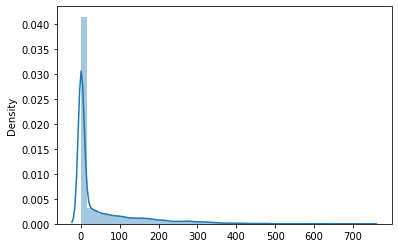

In [ ]:
sns.distplot(dataframe['lead_time'])

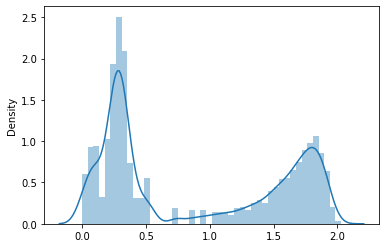

In [ ]:
import numpy as np
def handle_outlier(col):
  dataframe[col]=np.log1p(dataframe[col])
handle_outlier ('lead_time')
sns.distplot(dataframe['lead_time'])




In [ ]:
##adr

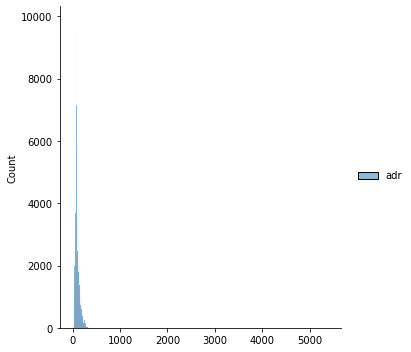

In [ ]:
sns.displot(dataframe['adr'])

In [ ]:
handle_outlier('adr')

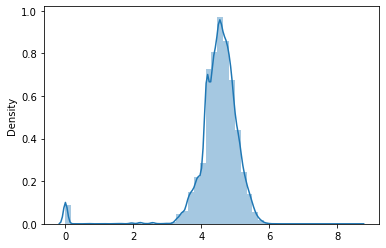

In [ ]:
sns.distplot(dataframe['adr'].dropna())

In [ ]:
dataframe.isnull().sum()

hotel                          0
is_canceled                    0
lead_time                      0
arrival_date_year              0
arrival_date_month             0
                              ..
adr                            1
required_car_parking_spaces    0
total_of_special_requests      0
reservation_status             0
reservation_status_date        0
Length: 64, dtype: int64

In [ ]:
dataframe.dropna(inplace=True)
dataframe.drop('is_canceled',axis=1)


,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,...,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0.277674,0.432249,0.370601,0.374644,0.369745,0.398895,0.375470,0,2,0.0,0,BB,PRT,Direct,Direct,0,...,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,Transient,0.000000,0,0,Check-Out,7/1/2015
1,0.277674,0.000000,0.370601,0.374644,0.369745,0.398895,0.375470,0,2,0.0,0,BB,PRT,Direct,Direct,0,...,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,Transient,0.000000,0,0,Check-Out,7/1/2015
2,0.277674,0.114850,0.370601,0.374644,0.369745,0.398895,0.375470,1,1,0.0,0,BB,GBR,Direct,Direct,0,...,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,Transient,4.330733,0,0,Check-Out,7/2/2015
3,0.277674,0.170731,0.370601,0.374644,0.369745,0.398895,0.375470,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,...,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,Transient,4.330733,0,0,Check-Out,7/2/2015
4,0.277674,0.183430,0.370601,0.374644,0.369745,0.398895,0.375470,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,...,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,Transient,4.595120,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0.417859,0.250725,0.387346,0.377823,0.356784,0.380593,0.375068,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,...,TA/TO,0,0,0,A,A,0,No Deposit,394.0,0.0,Transient,4.576153,0,0,Check-Out,9/6/2017
119386,0.417859,0.311426,0.387346,0.377823,0.356784,0.344359,0.375068,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,...,TA/TO,0,0,0,E,E,0,No Deposit,9.0,0.0,Transient,5.422436,0,2,Check-Out,9/7/2017
119387,0.417859,0.289258,0.387346,0.377823,0.356784,0.344359,0.375068,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,...,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0.0,Transient,5.067079,0,4,Check-Out,9/7/2017
119388,0.417859,0.313149,0.387346,0.377823,0.356784,0.344359,0.375068,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,...,TA/TO,0,0,0,A,A,0,No Deposit,89.0,0.0,Transient,4.657763,0,0,Check-Out,9/7/2017
